In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# sklearn: data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# sklearn: train model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report

# sklearn classifiers
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets, ensemble, model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
#Loading training and test data and concatanate


training_data = pd.read_csv('UNSW_NB15_training-set.csv')
testing_data = pd.read_csv('UNSW_NB15_testing-set.csv')

training_data

id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0            1  0.121478   tcp       -   FIN      6      4     258     172   
1            2  0.649902   tcp       -   FIN     14     38     734   42014   
2            3  1.623129   tcp       -   FIN      8     16     364   13186   
3            4  1.681642   tcp     ftp   FIN     12     12     628     770   
4            5  0.449454   tcp       -   FIN     10      6     534     268   
...        ...       ...   ...     ...   ...    ...    ...     ...     ...   
175336  175337  0.000009   udp     dns   INT      2      0     114       0   
175337  175338  0.505762   tcp       -   FIN     10      8     620     354   
175338  175339  0.000009   udp     dns   INT      2      0     114       0   
175339  175340  0.000009   udp     dns   INT      2      0     114       0   
175340  175341  0.000009   udp     dns   INT      2      0     114       0   

                 rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0           74.087490  ...                 1               1             0   
1           78.473372  ...                 1               2             0   
2           14.170161  ...                 1               3             0   
3           13.677108  ...                 1               3             1   
4           33.373826  ...                 1              40             0   
...               ...  ...               ...             ...           ...   
175336  111111.107200  ...                13              24             0   
175337      33.612649  ...                 1               2             0   
175338  111111.107200  ...                 3              13             0   
175339  111111.107200  ...                14              30             0   
175340  111111.107200  ...                16              30             0   

        ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0                0                 0           1           1                0   
1                0                 0           1           6                0   
2                0                 0           2           6                0   
3                1                 0           2           1                0   
4                0                 0           2          39                0   
...            ...               ...         ...         ...              ...   
175336           0                 0          24          24                0   
175337           0                 0           1           1                0   
175338           0                 0           3          12                0   
175339           0                 0          30          30                0   
175340           0                 0          30          30                0   

        attack_cat  label  
0           Normal      0  
1           Normal      0  
2           Normal      0  
3           Normal      0  
4           Normal      0  
...            ...    ...  
175336     Generic      1  
175337   Shellcode      1  
175338     Generic      1  
175339     Generic      1  
175340     Generic      1  

[175341 rows x 45 columns]

In [3]:
testing_data

id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0          1  0.000011   udp       -   INT      2      0     496       0   
1          2  0.000008   udp       -   INT      2      0    1762       0   
2          3  0.000005   udp       -   INT      2      0    1068       0   
3          4  0.000006   udp       -   INT      2      0     900       0   
4          5  0.000010   udp       -   INT      2      0    2126       0   
...      ...       ...   ...     ...   ...    ...    ...     ...     ...   
82327  82328  0.000005   udp       -   INT      2      0     104       0   
82328  82329  1.106101   tcp       -   FIN     20      8   18062     354   
82329  82330  0.000000   arp       -   INT      1      0      46       0   
82330  82331  0.000000   arp       -   INT      1      0      46       0   
82331  82332  0.000009   udp       -   INT      2      0     104       0   

                rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0       90909.090200  ...                 1               2             0   
1      125000.000300  ...                 1               2             0   
2      200000.005100  ...                 1               3             0   
3      166666.660800  ...                 1               3             0   
4      100000.002500  ...                 1               3             0   
...              ...  ...               ...             ...           ...   
82327  200000.005100  ...                 1               2             0   
82328      24.410067  ...                 1               1             0   
82329       0.000000  ...                 1               1             0   
82330       0.000000  ...                 1               1             0   
82331  111111.107200  ...                 1               1             0   

       ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0               0                 0           1           2                0   
1               0                 0           1           2                0   
2               0                 0           1           3                0   
3               0                 0           2           3                0   
4               0                 0           2           3                0   
...           ...               ...         ...         ...              ...   
82327           0                 0           2           1                0   
82328           0                 0           3           2                0   
82329           0                 0           1           1                1   
82330           0                 0           1           1                1   
82331           0                 0           1           1                0   

       attack_cat  label  
0          Normal      0  
1          Normal      0  
2          Normal      0  
3          Normal      0  
4          Normal      0  
...           ...    ...  
82327      Normal      0  
82328      Normal      0  
82329      Normal      0  
82330      Normal      0  
82331      Normal      0  

[82332 rows x 45 columns]

In [4]:
concatenated_data = pd.concat([training_data, testing_data])
concatenated_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257673 entries, 0 to 82331
Data columns (total 45 columns):
id                   257673 non-null int64
dur                  257673 non-null float64
proto                257673 non-null object
service              257673 non-null object
state                257673 non-null object
spkts                257673 non-null int64
dpkts                257673 non-null int64
sbytes               257673 non-null int64
dbytes               257673 non-null int64
rate                 257673 non-null float64
sttl                 257673 non-null int64
dttl                 257673 non-null int64
sload                257673 non-null float64
dload                257673 non-null float64
sloss                257673 non-null int64
dloss                257673 non-null int64
sinpkt               257673 non-null float64
dinpkt               257673 non-null float64
sjit                 257673 non-null float64
djit                 257673 non-null float64
swin       

In [5]:
unique_categories = concatenated_data['attack_cat'].unique()

unique_categories

array(['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode',
       'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic'],
      dtype=object)

In [6]:
unique_labels = concatenated_data['label'].unique()

unique_labels

array([0, 1], dtype=int64)

In [7]:
concatenated_data.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [8]:
useful_data = concatenated_data.dropna()

In [9]:
useful_data.shape

(257673, 45)

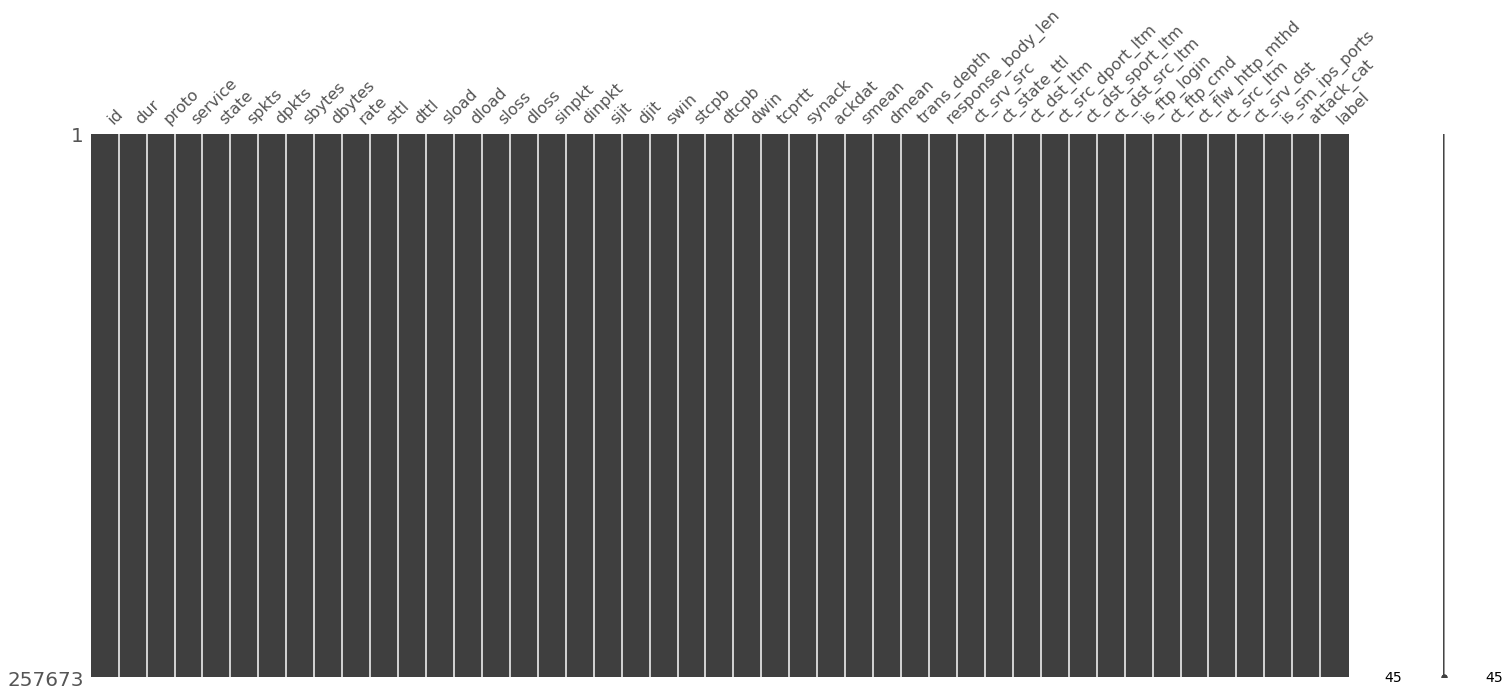

In [11]:
import missingno
import pickle

missingno.matrix(useful_data)

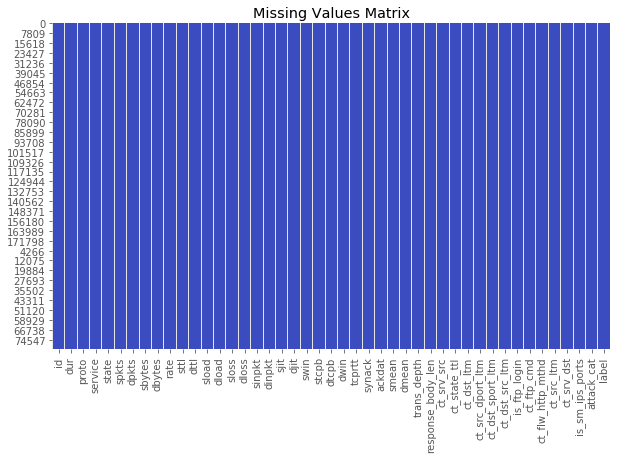

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(useful_data.isnull(), cbar=False, cmap='coolwarm')
plt.title('Missing Values Matrix')
plt.show()

In [15]:
useful_data.describe(include="all")

id            dur   proto service   state          spkts  \
count   257673.000000  257673.000000  257673  257673  257673  257673.000000   
unique            NaN            NaN     133      13      11            NaN   
top               NaN            NaN     tcp       -     FIN            NaN   
freq              NaN            NaN  123041  141321  117164            NaN   
mean     72811.823858       1.246715     NaN     NaN     NaN      19.777144   
std      48929.917641       5.974305     NaN     NaN     NaN     135.947152   
min          1.000000       0.000000     NaN     NaN     NaN       1.000000   
25%      32210.000000       0.000008     NaN     NaN     NaN       2.000000   
50%      64419.000000       0.004285     NaN     NaN     NaN       4.000000   
75%     110923.000000       0.685777     NaN     NaN     NaN      12.000000   
max     175341.000000      59.999989     NaN     NaN     NaN   10646.000000   

                dpkts        sbytes        dbytes          rate  ...  \
count   257673.000000  2.576730e+05  2.576730e+05  2.576730e+05  ...   
unique            NaN           NaN           NaN           NaN  ...   
top               NaN           NaN           NaN           NaN  ...   
freq              NaN           NaN           NaN           NaN  ...   
mean        18.514703  8.572952e+03  1.438729e+04  9.125391e+04  ...   
std        111.985965  1.737739e+05  1.461993e+05  1.603446e+05  ...   
min          0.000000  2.400000e+01  0.000000e+00  0.000000e+00  ...   
25%          0.000000  1.140000e+02  0.000000e+00  3.078928e+01  ...   
50%          2.000000  5.280000e+02  1.780000e+02  2.955665e+03  ...   
75%         10.000000  1.362000e+03  1.064000e+03  1.250000e+05  ...   
max      11018.000000  1.435577e+07  1.465753e+07  1.000000e+06  ...   

        ct_dst_sport_ltm  ct_dst_src_ltm   is_ftp_login     ct_ftp_cmd  \
count      257673.000000   257673.000000  257673.000000  257673.000000   
unique               NaN             NaN            NaN            NaN   
top                  NaN             NaN            NaN            NaN   
freq                 NaN             NaN            NaN            NaN   
mean            4.032677        8.322964       0.012819       0.012850   
std             5.831515       11.120754       0.116091       0.116421   
min             1.000000        1.000000       0.000000       0.000000   
25%             1.000000        1.000000       0.000000       0.000000   
50%             1.000000        3.000000       0.000000       0.000000   
75%             3.000000        8.000000       0.000000       0.000000   
max            46.000000       65.000000       4.000000       4.000000   

        ct_flw_http_mthd     ct_src_ltm     ct_srv_dst  is_sm_ips_ports  \
count      257673.000000  257673.000000  257673.000000    257673.000000   
unique               NaN            NaN            NaN              NaN   
top                  NaN            NaN            NaN              NaN   
freq                 NaN            NaN            NaN              NaN   
mean            0.132005       6.800045       9.121049         0.014274   
std             0.681854       8.396266      10.874752         0.118618   
min             0.000000       1.000000       1.000000         0.000000   
25%             0.000000       2.000000       2.000000         0.000000   
50%             0.000000       3.000000       4.000000         0.000000   
75%             0.000000       8.000000      11.000000         0.000000   
max            30.000000      60.000000      62.000000         1.000000   

        attack_cat          label  
count       257673  257673.000000  
unique          10            NaN  
top         Normal            NaN  
freq         93000            NaN  
mean           NaN       0.639077  
std            NaN       0.480269  
min            NaN       0.000000  
25%            NaN       0.000000  
50%            NaN       1.000000  
75%            NaN       1.000000  
max            NaN 

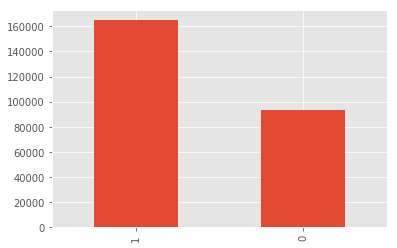

In [16]:
useful_data['label'].value_counts().plot.bar()

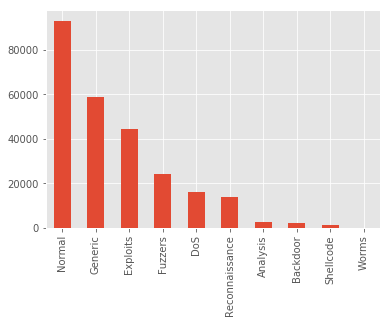

In [17]:
useful_data['attack_cat'].value_counts().plot.bar()

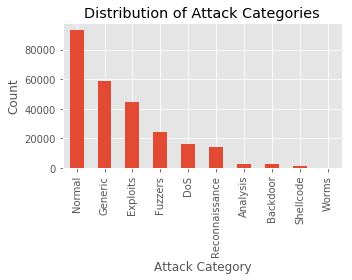

In [18]:
plt.figure(figsize=(5, 4))
useful_data['attack_cat'].value_counts().plot.bar()
plt.xlabel('Attack Category')
plt.ylabel('Count')
plt.title('Distribution of Attack Categories')
plt.tight_layout()
plt.show()

In [19]:
useful_data['label'].value_counts(normalize=True)

1    0.639077
0    0.360923
Name: label, dtype: float64

## Dataset Balance Ratio

In [20]:
labels = useful_data['label']
attacks = useful_data['attack_cat']

Distributions of labels: 0.6:1 (93000/164673)


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


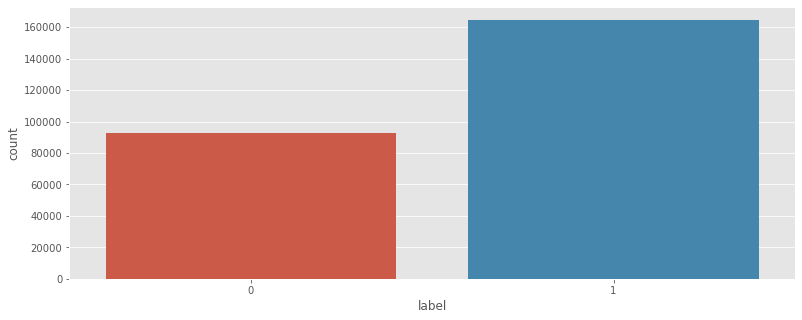

In [18]:
def AttackLabel_ratio(input):
    
    #Calculate ratio
    
    unique, count = np.unique(input, return_counts=True)
    ratio = round(count[0]/count[1], 1)
    return f'{ratio}:1 ({count[0]}/{count[1]})'

print('Distributions of labels:', AttackLabel_ratio(labels))
plt.figure(figsize=(13,5))
sns.countplot(labels,label="Sum")
plt.show()

Distribution of attack types: 1.1:1 (2677/2329)


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


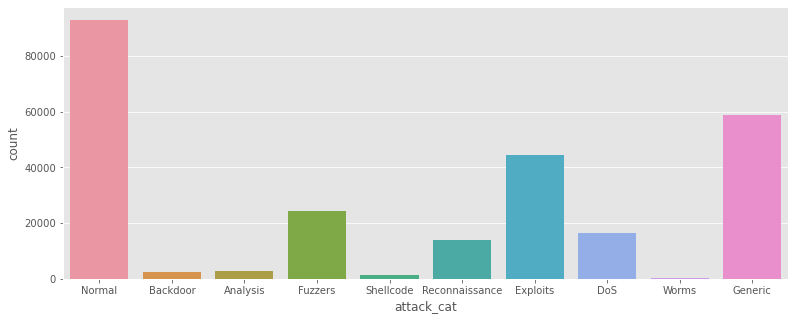

In [19]:
print('Distribution of attack types:', AttackLabel_ratio(attacks))
plt.figure(figsize=(13,5))
sns.countplot(attacks,label="Sum")
plt.show()

### Encoding categorical features Encoding categorical features using LabelEncoder.

In [21]:
# Select categorical columns
categorical_columns = useful_data.select_dtypes(include=['object']).columns
# Encode categorical features with LabelEncoder
encoding = LabelEncoder()
useful_data[categorical_columns] = useful_data[categorical_columns].apply(encoding.fit_transform)

In [22]:
useful_data.head()

id       dur  proto  service  state  spkts  dpkts  sbytes  dbytes  \
0   1  0.121478    113        0      4      6      4     258     172   
1   2  0.649902    113        0      4     14     38     734   42014   
2   3  1.623129    113        0      4      8     16     364   13186   
3   4  1.681642    113        3      4     12     12     628     770   
4   5  0.449454    113        0      4     10      6     534     268   

        rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
0  74.087490  ...                 1               1             0           0   
1  78.473372  ...                 1               2             0           0   
2  14.170161  ...                 1               3             0           0   
3  13.677108  ...                 1               3             1           1   
4  33.373826  ...                 1              40             0           0   

   ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  \
0                 0           1           1                0           6   
1                 0           1           6                0           6   
2                 0           2           6                0           6   
3                 0           2           1                0           6   
4                 0           2          39                0           6   

   label  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 45 columns]

# Data Correlation

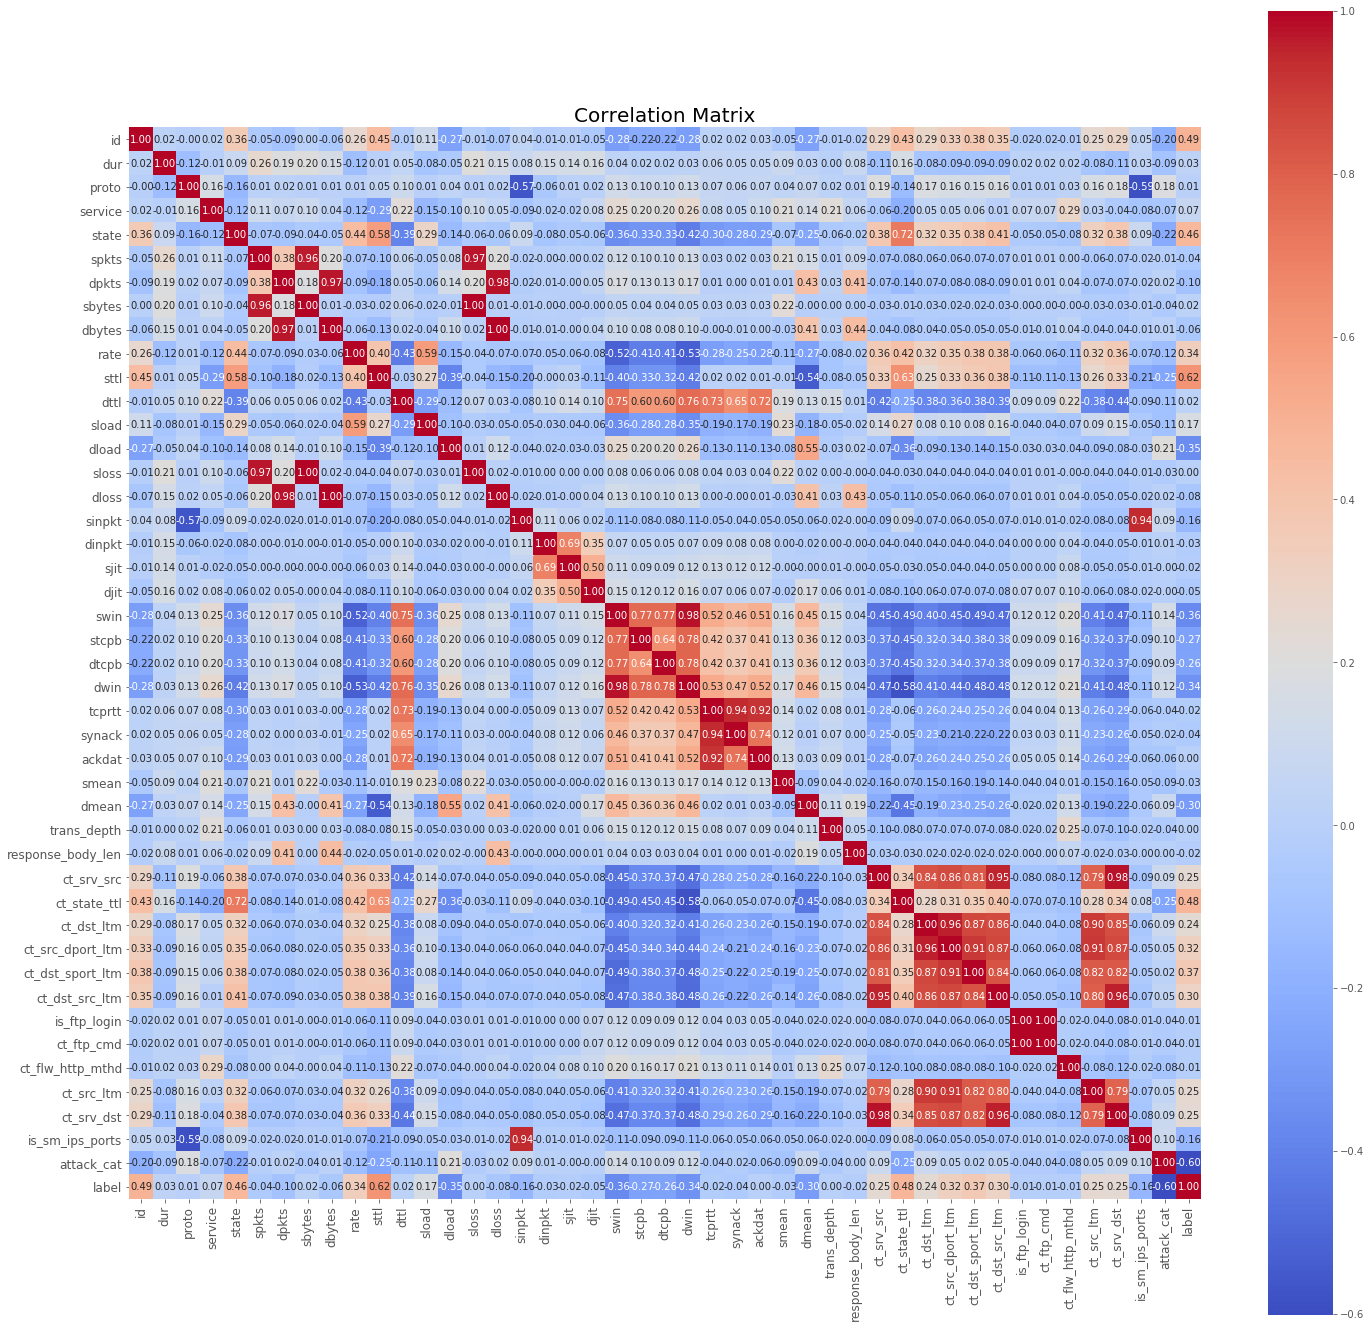

In [23]:
fig = plt.figure(figsize=(24, 24))
sns.heatmap(useful_data.corr(), cmap='coolwarm', annot=True, fmt='.2f', square=True)
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

fig.savefig('Features with Corelation.png')

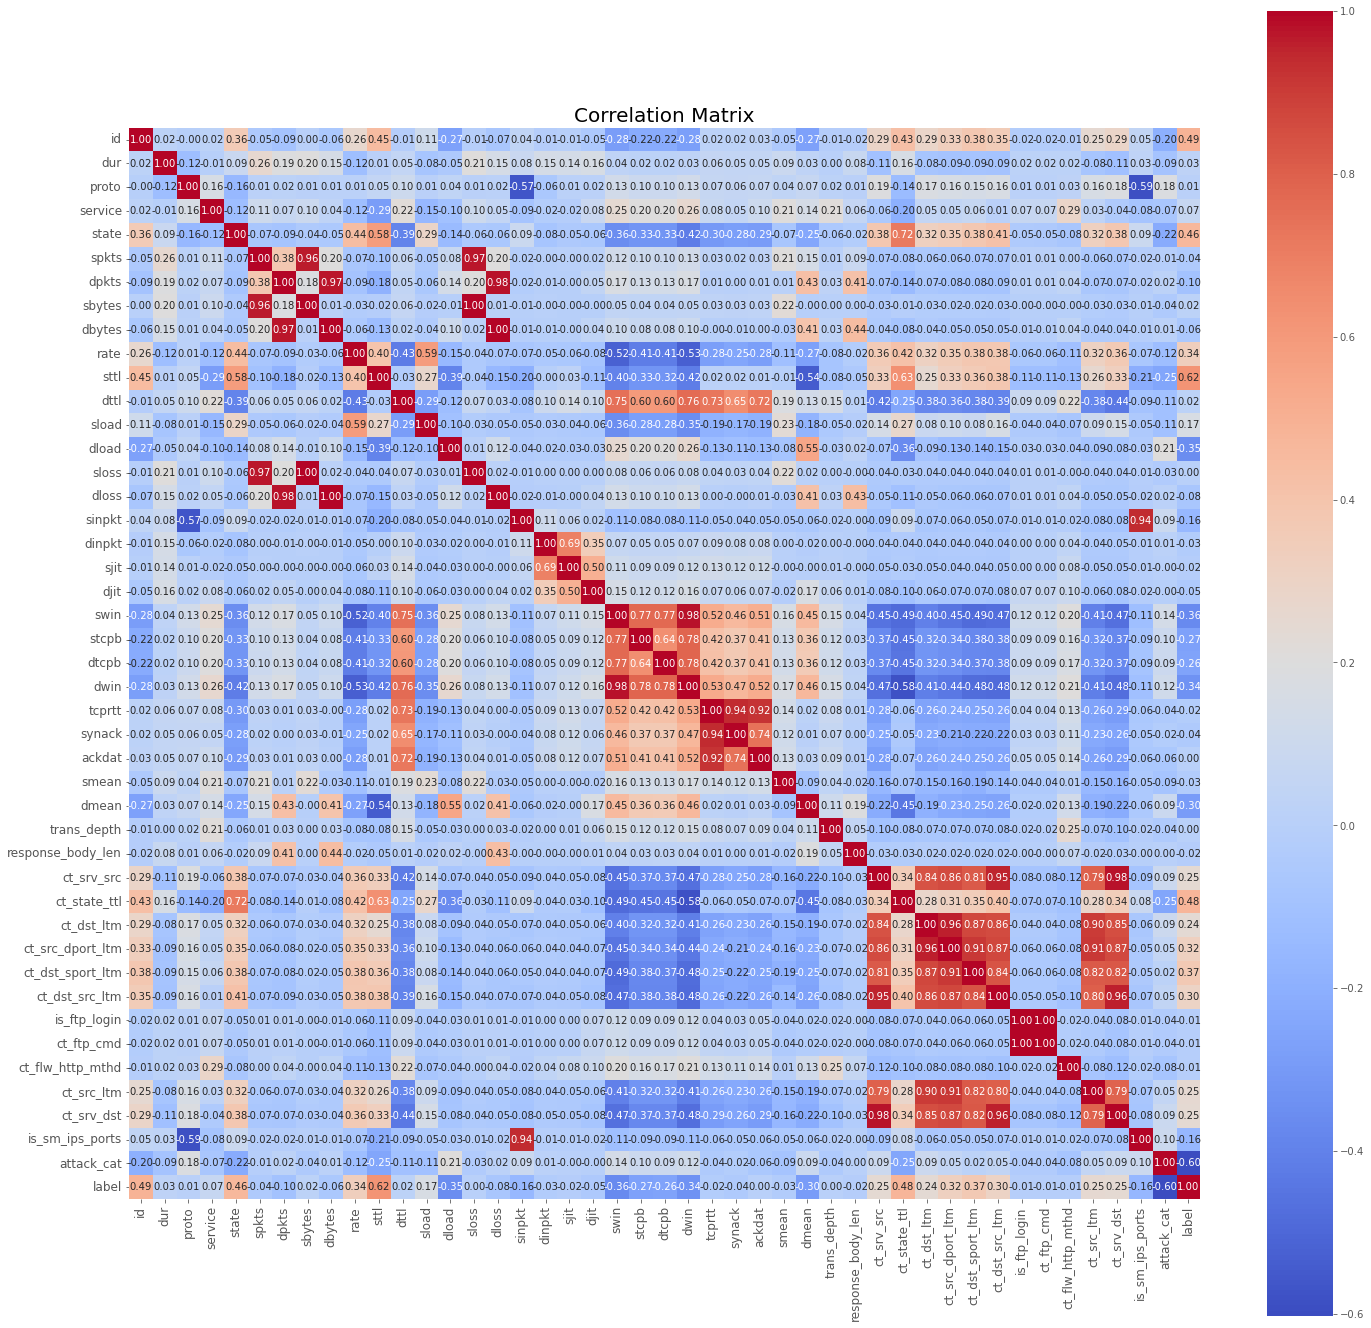

In [23]:
plt.figure(figsize=(24, 24))
sns.heatmap(useful_data.corr(), cmap='coolwarm', annot=True, fmt='.2f', square=True)
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

fig = plt.gcf()
fig.savefig('Features with Corelation.png', dpi=300)

In [24]:
corr_matrix = useful_data.corr().abs()
correlated_vars = corr_matrix[corr_matrix > 0.98].stack().reset_index()
correlated_vars = correlated_vars[correlated_vars['level_0'] < correlated_vars['level_1']]
correlated_vars.columns = ['Var1', 'Var2', 'Corr']
correlated_vars = correlated_vars.sort_values(by='Corr', ascending=False)
print(correlated_vars)

          Var1          Var2      Corr
45  ct_ftp_cmd  is_ftp_login  0.998855
10      dbytes         dloss  0.996711
8       sbytes         sloss  0.995772
28        dwin          swin  0.980458


In [25]:
corr_matrix = useful_data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.98)]
useful_data = useful_data.drop(columns=to_drop)

In [26]:
useful_data

id       dur  proto  service  state  spkts  dpkts  sbytes  dbytes  \
0          1  0.121478    113        0      4      6      4     258     172   
1          2  0.649902    113        0      4     14     38     734   42014   
2          3  1.623129    113        0      4      8     16     364   13186   
3          4  1.681642    113        3      4     12     12     628     770   
4          5  0.449454    113        0      4     10      6     534     268   
...      ...       ...    ...      ...    ...    ...    ...     ...     ...   
82327  82328  0.000005    119        0      5      2      0     104       0   
82328  82329  1.106101    113        0      4     20      8   18062     354   
82329  82330  0.000000      6        0      5      1      0      46       0   
82330  82331  0.000000      6        0      5      1      0      46       0   
82331  82332  0.000009    119        0      5      2      0     104       0   

                rate  ...  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  \
0          74.087490  ...                 1                 1               1   
1          78.473372  ...                 1                 1               2   
2          14.170161  ...                 1                 1               3   
3          13.677108  ...                 1                 1               3   
4          33.373826  ...                 2                 1              40   
...              ...  ...               ...               ...             ...   
82327  200000.005100  ...                 1                 1               2   
82328      24.410067  ...                 1                 1               1   
82329       0.000000  ...                 1                 1               1   
82330       0.000000  ...                 1                 1               1   
82331  111111.107200  ...                 1                 1               1   

       is_ftp_login  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  \
0                 0                 0           1           1   
1                 0                 0           1           6   
2                 0                 0           2           6   
3                 1                 0           2           1   
4                 0                 0           2          39   
...             ...               ...         ...         ...   
82327             0                 0           2           1   
82328             0                 0           3           2   
82329             0                 0           1           1   
82330             0                 0           1           1   
82331             0                 0           1           1   

       is_sm_ips_ports  attack_cat  label  
0                    0           6      0  
1                    0           6      0  
2                    0           6      0  
3                    0           6      0  
4                    0           6      0  
...                ...         ...    ...  
82327                0           6      0  
82328                0           6      0  
82329                1           6      0  
82330                1           6      0  
82331                0           6      0  

[257673 rows x 41 columns]

In [27]:
useful_data = useful_data.drop(axis=1, columns=['id','attack_cat'])

In [28]:
useful_data

dur  proto  service  state  spkts  dpkts  sbytes  dbytes  \
0      0.121478    113        0      4      6      4     258     172   
1      0.649902    113        0      4     14     38     734   42014   
2      1.623129    113        0      4      8     16     364   13186   
3      1.681642    113        3      4     12     12     628     770   
4      0.449454    113        0      4     10      6     534     268   
...         ...    ...      ...    ...    ...    ...     ...     ...   
82327  0.000005    119        0      5      2      0     104       0   
82328  1.106101    113        0      4     20      8   18062     354   
82329  0.000000      6        0      5      1      0      46       0   
82330  0.000000      6        0      5      1      0      46       0   
82331  0.000009    119        0      5      2      0     104       0   

                rate  sttl  ...  ct_dst_ltm  ct_src_dport_ltm  \
0          74.087490   252  ...           1                 1   
1          78.473372    62  ...           1                 1   
2          14.170161    62  ...           2                 1   
3          13.677108    62  ...           2                 1   
4          33.373826   254  ...           2                 2   
...              ...   ...  ...         ...               ...   
82327  200000.005100   254  ...           2                 1   
82328      24.410067   254  ...           2                 1   
82329       0.000000     0  ...           1                 1   
82330       0.000000     0  ...           1                 1   
82331  111111.107200   254  ...           1                 1   

       ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_flw_http_mthd  \
0                     1               1             0                 0   
1                     1               2             0                 0   
2                     1               3             0                 0   
3                     1               3             1                 0   
4                     1              40             0                 0   
...                 ...             ...           ...               ...   
82327                 1               2             0                 0   
82328                 1               1             0                 0   
82329                 1               1             0                 0   
82330                 1               1             0                 0   
82331                 1               1             0                 0   

       ct_src_ltm  ct_srv_dst  is_sm_ips_ports  label  
0               1           1                0      0  
1               1           6                0      0  
2               2           6                0      0  
3               2           1                0      0  
4               2          39                0      0  
...           ...         ...              ...    ...  
82327           2           1                0      0  
82328           3           2                0      0  
82329           1           1                1      0  
82330           1           1                1      0  
82331           1           1                0      0  

[257673 rows x 39 columns]

In [29]:
X = useful_data.drop(columns=['label'])
feature_list = list(X.columns)

In [30]:
print(len(feature_list))
feature_list

38


['dur',
 'proto',
 'service',
 'state',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports']

In [31]:
y = useful_data['label']


# Train/Test Splitting

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [33]:
print("Training set:", len(X_train))
print("Testing set:", len(X_test))

Training set: 180371
Testing set: 77302


In [34]:
standardrize_feature = StandardScaler().fit(X_train)
X_train = standardrize_feature.transform(X_train)
X_test = standardrize_feature.transform(X_test)

In [35]:
print(X_train.shape)
print(X_test.shape)

(180371, 38)
(77302, 38)


In [36]:
X_train_reshaped = X_train.reshape(X_train.shape[0], 38, 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], 38, 1)

In [37]:
print(X_train_reshaped.shape)
print(X_test_reshaped.shape)

(180371, 38, 1)
(77302, 38, 1)


# LSTM Classifier

In [38]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Conv2D, SeparableConv2D, Dense, Flatten, Dropout, Activation, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D, concatenate, Conv2DTranspose
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras import utils as np_utils
from tensorflow.keras.metrics import Precision, Recall, Accuracy
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout

import os
from os import listdir
from os.path import isfile, join
import copy
import random

from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import MaxPool2D, Reshape, Concatenate
from tensorflow.keras.regularizers import l2

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

c:\Users\ILLUMINATI\.conda\envs\tensorflow_classic\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\ILLUMINATI\.conda\envs\tensorflow_classic\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\ILLUMINATI\.conda\envs\tensorflow_classic\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\ILLUMINATI\.conda\e

In [39]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

Using TensorFlow backend.


In [72]:
def unsw_nb15_lstm():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(20, input_shape=(38,1)))
    model.add(tf.keras.layers.Dense(20, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    
    model.summary()

    print("----Training the network----")
    model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy',f1_m,precision_m, recall_m]
                 )    
    
    early_stop = EarlyStopping(monitor='val_loss', 
                            mode='min', 
                            patience = 10 ,
                            restore_best_weights=True)
    #model_checkpoint
    mc = ModelCheckpoint('unsw_nb15_model_lstm.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
    r = model.fit(X_train_reshaped, y_train, 
                validation_data = (X_test_reshaped, y_test), 
                epochs = 200, 
                verbose = 1,
                batch_size = 2000,
                callbacks = [early_stop,mc])

    n_epochs = len(r.history['loss'])

    return r,model,n_epochs

r,model,n_epochs = unsw_nb15_lstm()
model.save("unsw_nb15_model_lstm.h5")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20)                1760      
_________________________________________________________________
dense (Dense)                (None, 20)                420       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 2,201
Trainable params: 2,201
Non-trainable params: 0
_________________________________________________________________
----Training the network----
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 180371 samples, validate on 77302 samples
Epoch 1/200
180000/

# Tensorflow Scikit-learn Wrapper Model

In [70]:
def create_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(20, input_shape=(38,1)))
    model.add(tf.keras.layers.Dense(20, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', 
                  optimizer='adam',
                  metrics=['accuracy',f1_m,precision_m, recall_m]
                 )    

    return model

In [112]:
# Convert the TensorFlow model into a scikit-learn estimator
lstm_estimator = KerasClassifier(build_fn=create_model, epochs=10, batch_size=64)

# Fit the estimator on the training set
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True)
mc = ModelCheckpoint('unsw_nb15_model_lstm.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

history = lstm_estimator.fit(X_train_reshaped, y_train, 
                validation_data=(X_test_reshaped, y_test), 
                verbose=1,
                callbacks=[early_stop, mc])

Train on 180371 samples, validate on 77302 samples
Epoch 1/10
180352/180371 [============================>.] - ETA: 0s - loss: 0.2760 - acc: 0.8709 - f1_m: 0.9065 - precision_m: 0.8466 - recall_m: 0.9803
Epoch 00001: val_loss improved from inf to 0.21968, saving model to unsw_nb15_model_cnn.h5
180371/180371 [==============================] - 53s 294us/sample - loss: 0.2760 - acc: 0.8709 - f1_m: 0.9065 - precision_m: 0.8467 - recall_m: 0.9803 - val_loss: 0.2197 - val_acc: 0.8973 - val_f1_m: 0.9220 - val_precision_m: 0.8887 - val_recall_m: 0.9596
Epoch 2/10
180160/180371 [============================>.] - ETA: 0s - loss: 0.2119 - acc: 0.8968 - f1_m: 0.9224 - precision_m: 0.8802 - recall_m: 0.9710
Epoch 00002: val_loss improved from 0.21968 to 0.19939, saving model to unsw_nb15_model_cnn.h5
180371/180371 [==============================] - 49s 269us/sample - loss: 0.2120 - acc: 0.8968 - f1_m: 0.9224 - precision_m: 0.8802 - recall_m: 0.9710 - val_loss: 0.1994 - val_acc: 0.9010 - val_f1_m: 0

# Learning Curves (Accuracy/Loss vs Training Samples)

In [135]:
from sklearn.model_selection import learning_curve

classifier = KerasClassifier(build_fn=create_model, epochs=1, batch_size=64, verbose=0)

# Create the learning curve
train_sizes, train_acc_scores, test_acc_scores = learning_curve(classifier, X_train_reshaped, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
train_sizes, train_loss_scores, test_loss_scores = learning_curve(classifier, X_train_reshaped, y_train, cv=5, scoring='loss', train_sizes=np.linspace(0.1, 1.0, 10))

ValueError: 'loss' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [ ]:
# Calculate the mean and standard deviation of train and test scores
train_acc_mean = np.mean(train_acc_scores, axis=1)
train_acc_std = np.std(train_acc_scores, axis=1)
test_acc_mean = np.mean(test_acc_scores, axis=1)
test_acc_std = np.std(test_acc_scores, axis=1)

train_loss_mean = -np.mean(train_loss_scores, axis=1)
train_loss_std = np.std(train_loss_scores, axis=1)
test_loss_mean = -np.mean(test_loss_scores, axis=1)
test_loss_std = np.std(test_loss_scores, axis=1)

In [ ]:
# Plot learning curves
plt.figure(figsize=(10, 6))
plt.title("Learning Curves")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Validation Score")
plt.legend(loc="best")
plt.show()

# Learning Curves (Accuracy/Loss vs Epoch)

### Extract accuracy and loss values from the history object

In [130]:
# Extract accuracy and loss values from the history object
train_acc = history.history['acc']
train_loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

# Calculate the mean and standard deviation of train and test scores
train_acc_mean_2 = train_acc - np.mean(train_acc)
train_acc_std_2 = train_acc - np.std(train_acc)
test_acc_mean_2 = val_acc - np.mean(val_acc)
test_acc_std_2 = val_acc - np.std(val_acc)

train_loss_mean_2 = train_loss - np.mean(train_loss)
train_loss_std_2 = train_loss - np.std(train_loss)
test_loss_mean_2 = val_loss - np.mean(val_loss)
test_loss_std_2 = val_loss - np.std(val_loss)

# Create the epochs array
epochs = range(1, len(train_acc) + 1)

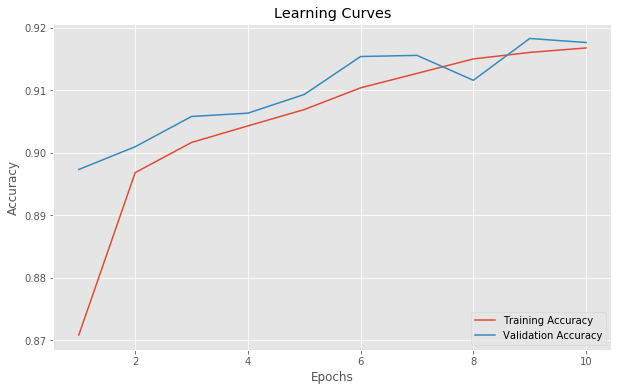

In [131]:
# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend(loc='lower right')
plt.grid(True)  
plt.show()

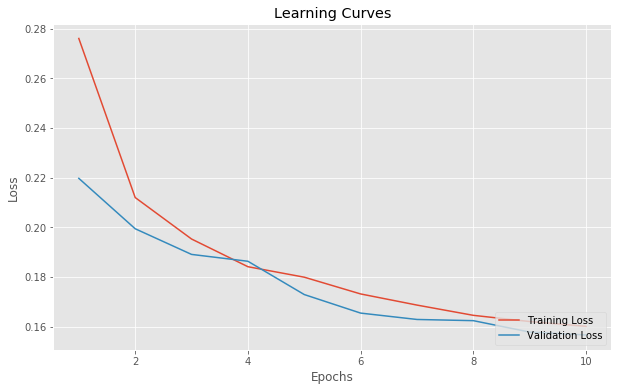

In [132]:
# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curves')
plt.legend(loc='lower right')
plt.grid(True)  
plt.show()

# Predictions and Accuracy Score

In [44]:
LabelsToClasses = {'Normal': 0,'Attack': 1}
ClassesToLabels = {0:'Normal', 1:'Attack'}

In [165]:
# Predict on the test set
y_pred = lstm_estimator.predict(X_test_reshaped)
y_pred = np.argmax(y_pred, axis=1)

In [150]:
y_pred = model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred, axis=1)

In [152]:
y_classes = model.predict_classes(X_test_reshaped)

[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


In [170]:
import sklearn
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from tabulate import tabulate


# Evaluate the classifier

train_score = lstm_estimator.score(X_train_reshaped, y_train)
accuracy = lstm_estimator.score(X_test_reshaped, y_test)
precision = sklearn.metrics.precision_score(y_test, y_classes)
recall = sklearn.metrics.recall_score(y_test, y_classes)
support = np.sum(sklearn.metrics.confusion_matrix(y_test, y_classes), axis=1)
    
table_data = [["Training score", train_score],
              ["Accuracy", accuracy],
              ["Precision", precision],
              ["Recall", recall],
              ["Support", support[1]]]

table_header = ["Metric", "Value"]
print(tabulate(table_data, headers=table_header))

77302/77302 [==============================] - 6s 80us/sample - loss: 0.1566 - acc: 0.9176 - f1_m: 0.9363 - precision_m: 0.9170 - recall_m: 0.9580
Metric                 Value
--------------  ------------
Training score      0.917492
Accuracy            0.917622
Precision           0.639582
Recall              1
Support         49441


# Classification Report

In [171]:
# Generate a classification report
report = classification_report(y_test, y_classes, target_names=ClassesToLabels.values())
print(report)

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00     27861
      Attack       0.64      1.00      0.78     49441

    accuracy                           0.64     77302
   macro avg       0.32      0.50      0.39     77302
weighted avg       0.41      0.64      0.50     77302



# Confusion Matrix

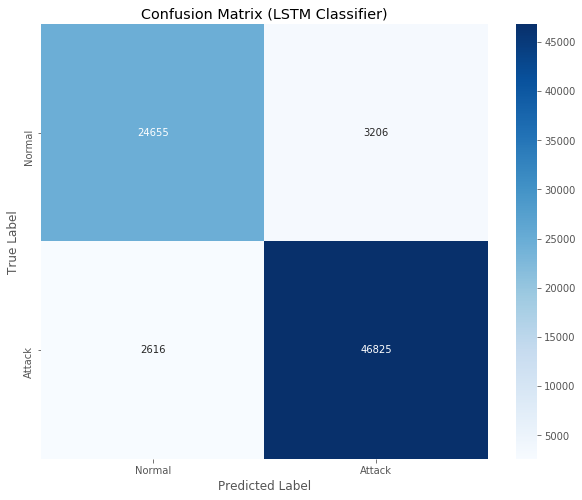

In [75]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", 
            xticklabels=list(LabelsToClasses.keys()),
            yticklabels=list(LabelsToClasses.keys()),)
plt.title("Confusion Matrix (LSTM Classifier)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC-AUC Curve

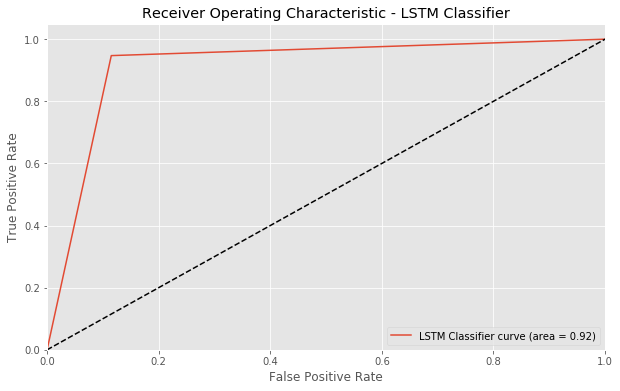

In [76]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='LSTM Classifier curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - LSTM Classifier')
plt.legend(loc='lower right')
plt.show()

# Feature Importances

[0.34125322]


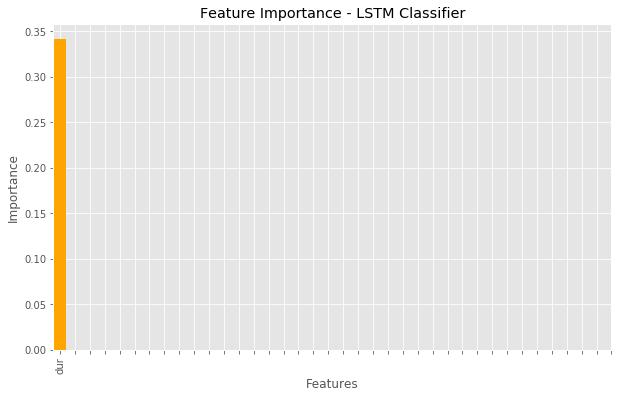

In [109]:
# Extract the LSTM model from the KerasClassifier
lstm_model = lstm_estimator.model

# Retrieve the weights of the LSTM layer(s)
lstm_layer = lstm_model.layers[0]  # Assuming LSTM layer is the first layer
lstm_weights = lstm_layer.get_weights()[0]

# Calculate the feature importances based on the magnitude of the weights
importances = np.abs(lstm_weights).mean(axis=1)
print(importances)
# Sort the features by their importances
indices = np.argsort(importances)[::-1]

feature_names = feature_list
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(indices)), importances[indices], color='orange', align='center')
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance - LSTM Classifier')
plt.show()

In [40]:
model = tf.keras.models.load_model("unsw_nb15_model_lstm.h5", custom_objects={"f1_m": f1_m, "precision_m": precision_m, "recall_m": recall_m})

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [88]:
import shap

# Wrap the TensorFlow model with SHAP's KernelExplainer
explainer = shap.DeepExplainer(model, X_train_reshaped[:1000])

# Calculate SHAP values for the sample
deep_shap_values = explainer.shap_values(X_test_reshaped[:1000])

In [89]:
print(np.asarray(deep_shap_values).shape)
shap_values = np.asarray(deep_shap_values)[0]
print(shap_values.shape)
shap_values = shap_values.reshape(shap_values.shape[0], shap_values.shape[1])
print(shap_values.shape)
print(X_test[:1000].shape)

(1, 1000, 38, 1)
(1000, 38, 1)
(1000, 38)
(1000, 38)


## SHAP Summary Plot (Bar Plot)

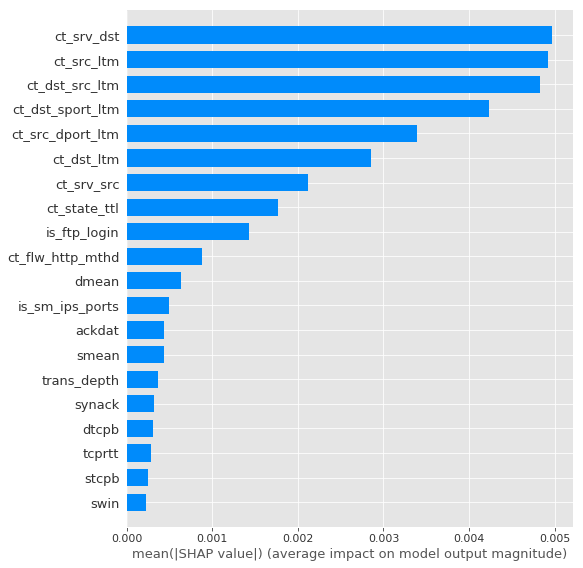

In [90]:
# Plot SHAP Tree Explainer for both classes 
plt.figure(figsize=(16, 8))
shap.summary_plot(shap_values, X_test[:1000], plot_type="bar", feature_names=np.asarray(feature_list), class_names=ClassesToLabels)
plt.show()

## SHAP Summary Plot

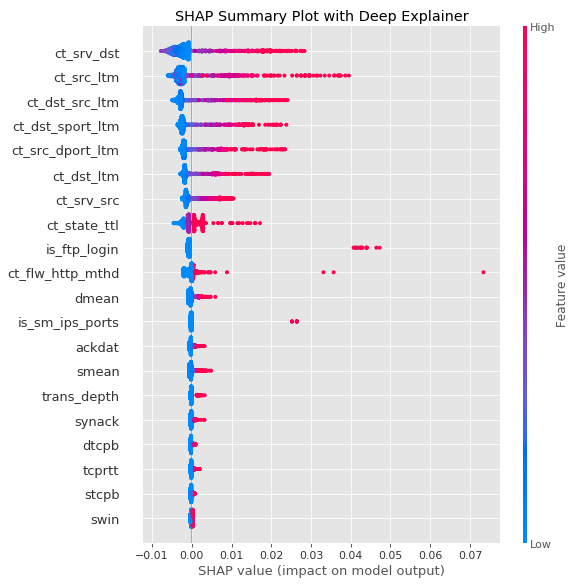

In [91]:
# Plot SHAP Tree Explainer for Attack Class
plt.figure(figsize=(16, 8))
plt.title('SHAP Summary Plot with Deep Explainer')
plt.xlabel('Mean SHAP Value (average impact on model output magnitude)')
shap.summary_plot(shap_values, X_test[:1000], feature_names = feature_list, class_names=ClassesToLabels)
plt.show()

## SHAP Dependence Plot (Feature 0)

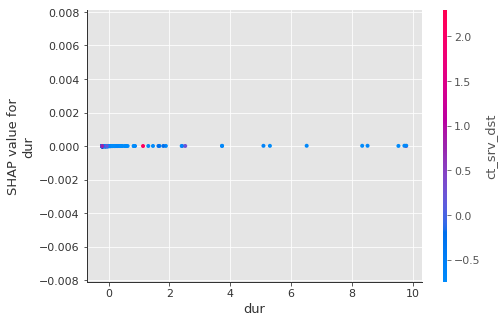

In [92]:
# Create the SHAP Dependence plot
shap.dependence_plot(0, shap_values, X_test[:1000], feature_names=feature_list)

## SHAP Dependence Plot (Feature 2)

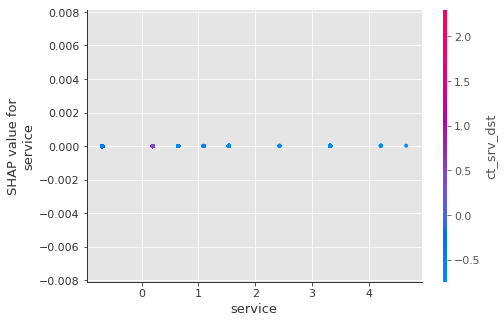

In [93]:
# Create the SHAP Dependence plot
shap.dependence_plot(2, shap_values, X_test[:1000], feature_names=feature_list)

## SHAP Waterfall Plot (Single Sample)

In [94]:
print(shap_values.shape)
print(explainer.expected_value.shape)

(1000, 38)
(1,)


In [ ]:
# Create the SHAP waterfall plot
exp = shap.Explanation(shap_values, explainer.expected_value[0], data=X_test[:1000], feature_names=np.asarray(feature_list))
idx = 2

# Set the title and axis labels
plt.figure(figsize=(16, 8))
plt.title('SHAP Waterfall Plot for X_test[{}]'.format(idx))
plt.xlabel('SHAP Value')
shap.plots.waterfall(shap_values, max_display=40)
plt.show()

## SHAP Force Plot (1000 Samples)

In [95]:
print(deep_shap_values[0][0].shape)
print(X_test.shape)
print(shap_values.shape)
print(X_test[0].shape)

(38, 1)
(77302, 38)
(1000, 38)
(38,)


In [96]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values, X_test[:1000], feature_names = feature_list)

## SHAP Force Plot (Single Sample)

In [97]:
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test[0], feature_names = feature_list)